In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test_scaled)

In [7]:
accuracy_score(y_test, y_pred)

0.9824561403508771

In [8]:
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

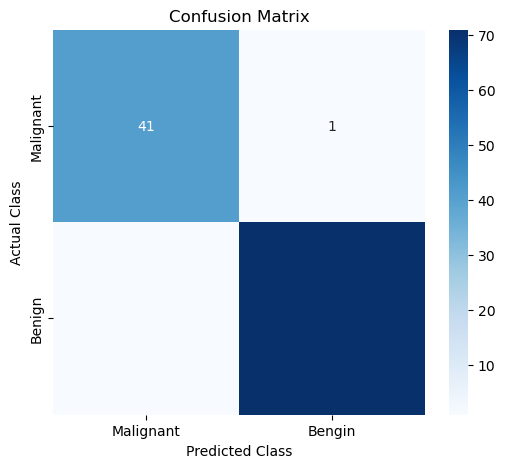

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Bengin'], 
            yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()